# Pandas 3
### Matthew Mella
### 09/29/23

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [32]:
def prob1():
    """
    Use a groupby object to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    # read in the data
    df = pd.read_csv('college.csv')

    public_or_private = df.groupby("Private")

    # create describe dataframes
    ratio_describe = public_or_private["S.F.Ratio"].describe()
    
    top_ten_describe = public_or_private["Top10perc"].describe()

    top_25_describe = public_or_private["Top25perc"].describe()

    # get the idxmax from each dataframe
    ratio_idx = ratio_describe["mean"].idxmax()
    top_ten_idx = top_ten_describe["mean"].idxmax()
    top_25_idx = top_25_describe["mean"].idxmax()
    
    # return the max row as numpy
    return ratio_describe.loc[ratio_idx].to_numpy(), top_ten_describe.loc[top_ten_idx].to_numpy(), top_25_describe.loc[top_25_idx].to_numpy()


prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

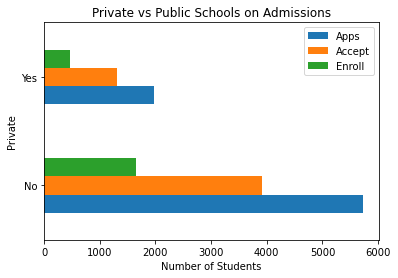

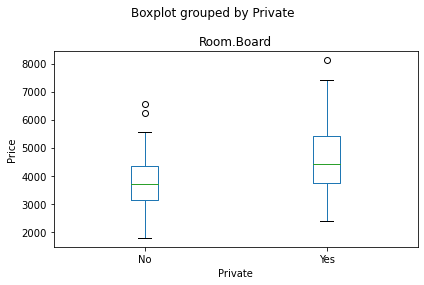

In [31]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    # read in the data
    df = pd.read_csv('college.csv')

    # create GroupBy object
    public_or_private = df.groupby("Private")

    # create visualization
    public_or_private[["Apps","Accept","Enroll"]].mean().plot(kind='barh', title="Private vs Public Schools on Admissions")

    plt.xlabel("Number of Students")

    plt.show()

    df.boxplot(column="Room.Board", by="Private", grid=False)
    plt.ylabel("Price")


    plt.tight_layout()
    plt.show()


prob2()

# Problem 3

In [25]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination has the highest Usual Weekly 
            Earnings in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week 
            per person?
    Note: Hard coding is okay as long as there is code that makes sense for each problem.
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    df = pd.read_csv('Ohio_1999.csv')

    # create and display pivot tables
    display(df.pivot_table(values="Usual Weekly Earnings", index="Sex", columns="Race", aggfunc="sum"))

    display(df.pivot_table(values="Usual Hours Worked", index="Sex", columns="Race", aggfunc="sum"))

    display(df.pivot_table(values="Usual Hours Worked", index="Sex", columns="Race", aggfunc="mean"))



    # return hard-code
    return((1,1),(3,2),(3,1))
prob3()

Race,1,2,3,4
Sex,,,,
1,145789,10768,0,5103
2,85867,6004,0,2553


Race,1,2,3,4
Sex,,,,
1,36939,2382,146,580
2,23335,2584,40,365


Race,1,2,3,4
Sex,,,,
1,43.254098,40.372881,48.666667,38.666667
2,40.512153,38.000000,40.000000,40.555556


((1, 1), (3, 2), (3, 1))

# Problem 4

In [24]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    # read in data
    df = pd.read_csv('Ohio_1999.csv')

    # create degree cut, check for education attainment
    degree = pd.cut(df["Educational Attainment"],[0,38,42,46])
    degree_interval = df.groupby(degree)['Educational Attainment'].count().idxmax()

    # create age cut, check for hours worked mean
    age_cut = pd.qcut(df["Age"],6)
    age_interval = df.groupby(age_cut)['Usual Hours Worked'].mean().idxmax()

    # create pivot table
    age_and_education = df.pivot_table(values = 'Yearly Salary', index = age_cut, columns = degree, aggfunc='mean')
    shape = age_and_education.values.shape
    # unravel tuple for argmin answers
    age_and_education_indeces = np.unravel_index(age_and_education.values.argmin(), shape)
    age_and_education_interval = (age_and_education.index[age_and_education_indeces[0]], age_and_education.columns[age_and_education_indeces[1]])

    # Return the intervals
    return degree_interval, age_interval, age_and_education_interval

prob4()

(Interval(38, 42, closed='right'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 38, closed='right')))

# Problem 5

In [26]:
def prob5():
   """
    Use College.csv to answer the following questions:
        1. Is there a partition in which the number of both 
           private and public universities does not increase 
           as the percentage of alumni that donates increases?
        2. Is the partition with the greatest number of schools 
           the same for private and public universities?
        3. Is it true that the partition that has the least 
           number of students from the top 10 percent of their 
           high school class that were admitted on average is 
           the same for both private and public universities?
        4. The average percentage of students admitted from the 
           top 10 percent of their high school class is very high
           in private universities with very low acceptance rates. 
           Why is this not a good conclusion to draw solely from 
           this dataset? Use only the data to explain why; do not 
           extrapolate.

    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
   """
   # read in data
   df = pd.read_csv('college.csv')

   # pt 1
   # create cut
   alum_cut = pd.cut(df['perc.alumni'], [0,20,40,60,80,100])
   display(df.pivot_table(values = 'perc.alumni',
                          index = alum_cut, 
                          columns = 'Private',
                          aggfunc='count'))
   

   # pt 2
   # create cut
   grad_cut = pd.cut(df['Grad.Rate'], [0,20,40,60,80,100])
   display(df.pivot_table(values = 'Grad.Rate', 
                          index = grad_cut, 
                          columns = 'Private', 
                          aggfunc='count'))
   

   # pt 3
   # make acc_rate col to cut from
   acc_rate = (df['Accept'] / df['Apps'])
   df['Acceptance Rate'] = acc_rate * 100

   # create cut
   accept_cut = pd.cut(df['Acceptance Rate'], [0,25,50,75,100])
   display(df.pivot_table(values = 'Top10perc', 
                  index = accept_cut, 
                  columns = 'Private', 
                  aggfunc='min'))
   
   # pt 4
   display(df.pivot_table(values = 'Top10perc', 
                  index = accept_cut,
                  columns = 'Private',
                  aggfunc='mean'))

   # return hard-code
   return (True, False, True, "No way to compare with public schools")
    

prob5()

Private,No,Yes
perc.alumni,,
"(0, 20]",170,209
"(20, 40]",39,287
"(40, 60]",1,67
"(60, 80]",0,2
"(80, 100]",0,0


Private,No,Yes
Grad.Rate,,
"(0, 20]",1,3
"(20, 40]",28,25
"(40, 60]",107,139
"(60, 80]",64,252
"(80, 100]",12,145


Private,No,Yes
Acceptance Rate,,
"(0, 25]",NaN,83.0
"(25, 50]",6.0,3.0
"(50, 75]",1.0,1.0
"(75, 100]",2.0,2.0


Private,No,Yes
Acceptance Rate,,
"(0, 25]",NaN,89.500000
"(25, 50]",35.947368,64.514286
"(50, 75]",24.478723,30.530726
"(75, 100]",18.757576,24.469741


(True, False, True, 'No way to compare with public schools')